## Statistical Inference on the American Housing Survey

In this notebook, statistical analysis is performed to determine which variables have the greatest correlation with home and neighborhood ratings. In addition, the statistical significance of these correlations will be verified.

In [1]:
# import packages that will be used for plotting and analyzing the data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
%matplotlib inline

In [2]:
# read in the data file for analysis

df = pd.read_csv('Data_Files/df_household_clean.csv')

C:\Users\wongk3.NA\AppData\Local\Continuum\Anaconda2\envs\newPy36\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


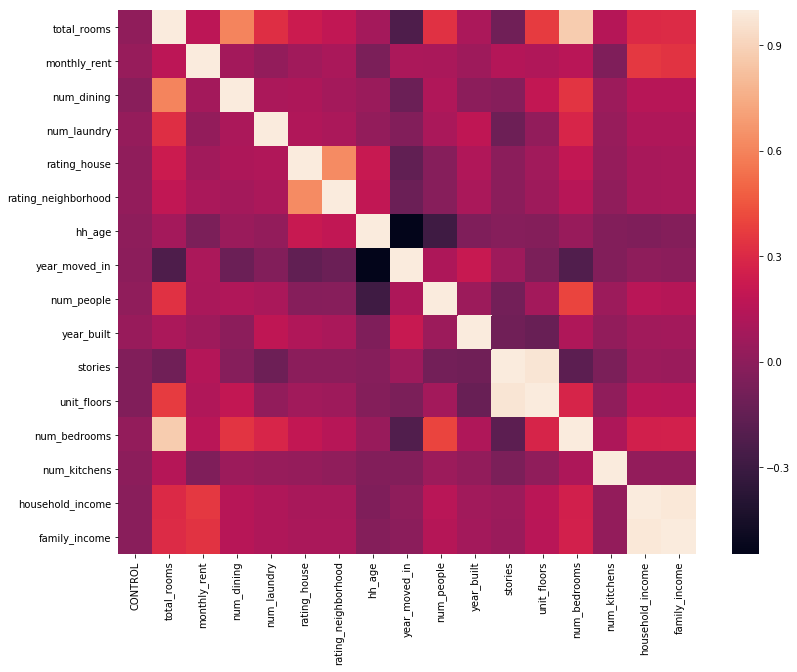

In [3]:
# create correlation matrix for numerical values 

f, ax = plt.subplots(figsize=(13, 10))
corrmat = df.corr()
sns.heatmap(corrmat[1:], vmax=1, square=True)

plt.show()

In general, there appears to be a slight to moderate postive correlation between rating_house/rating_neighborhood and the other variables. Some variables are not independent, such as stories to unit_floors, and household_income to family_income. 

The highest correlation for independent variables is between rating_house and rating_neighborhood. People who are satisfied with their home also tend to be satisfied with their neighborhood. The other highest positive correlations for rating_house seem to be total_rooms, hh_age and num_bedrooms. The other highest positive correlations for rating_neighborhood seem to be similar to the ones for rating_house.

A negative correlation seems to exist between the year the resident moved in and how they rate their home.

We will look at the correlation values to verify which categories have the highest correlations.

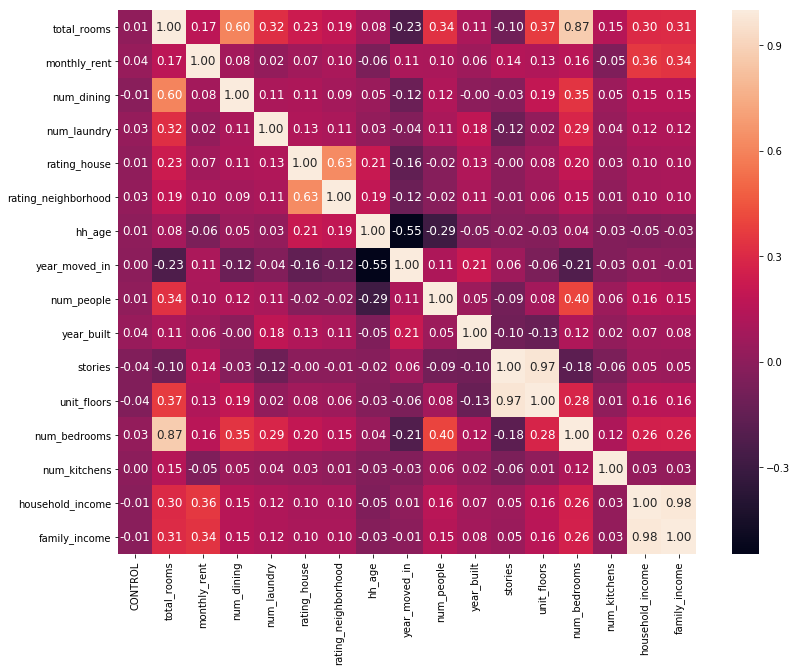

In [4]:
# take a closer look at the correlation values

f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corrmat[1:], annot=True, fmt='.2f', annot_kws={'size': 12}, vmax=1, square=True)
plt.show()

Out of the numerical variables, the most notable pearson correlations are these, where ${\rho}$ < -0.15 or ${\rho}$ > 0.15.

<ul><strong>For rating_house</strong>
<li>rating_neighborhood
<li>total_rooms</li>
<li>hh_age</li>
<li>num_bedrooms</li>
<li>year_moved_in</li>
</ul>

<ul><strong>For rating_neighborhood</strong>
<li>rating_house</li>
<li>total_rooms</li>
<li>hh_age</li>
<li>num_bedrooms</li>
</ul>

In [5]:
# find the p-values for variables with high or low pearson correlations with home ratings

high_corr_home = ['rating_neighborhood', 'total_rooms', 'hh_age', 'num_bedrooms', 'year_moved_in']

for i in high_corr_home:
    print(i, scipy.stats.pearsonr(df['rating_house'], df[i]))

rating_neighborhood (0.63015795903725946, 0.0)
total_rooms (0.23025241547195274, 0.0)
hh_age (0.2137715946399161, 0.0)
num_bedrooms (0.19557474849364975, 0.0)
year_moved_in (-0.15717658482071173, 1.0437087361831749e-318)


In [6]:
# find the p-values for variables with high or low pearson correlations with neighborhood ratings

high_corr_nh = ['rating_house', 'total_rooms', 'hh_age', 'num_bedrooms']

for i in high_corr_nh:
    print(i, scipy.stats.pearsonr(df['rating_neighborhood'], df[i]))


rating_house (0.63015795903725946, 0.0)
total_rooms (0.1858311348600484, 0.0)
hh_age (0.18971541114121604, 0.0)
num_bedrooms (0.15250498297061615, 5.9475786704321474e-300)


The p-values are all zero or extremely small, indicating that the correlation is statistically significant. These variables will be used as indicators for how people rate their homes and neighborhoods.

To analyze the relationship between home ratings/neighborhood ratings with the categorical variables, an analysis of variance (ANOVA) will be performed.

In [ ]:
# create DataFrame for ANOVA statistics and p-values for rating_house

df_ANOVA_house = pd.DataFrame(columns=['fvalue', 'pvalue'])

In [ ]:
# perform ANOVA analysis on the variables and add values to df_ANOVA_house

for column in df:
    df2 = df.groupby(column)
    x = [df2['rating_house'].get_group(x) for x in df2.groups]        
    df_ANOVA_house.loc[column] = [*stats.f_oneway(*x)]


In [ ]:
# drop rows

df_ANOVA_house.drop(['rating_house', 'CONTROL'], inplace=True)
df_ANOVA_house.sort_values(['pvalue', 'fvalue'], ascending=[True, False])

### The variables with the greatest f-statistics for home ratings are:

<ul>
<li>rating_neighborhood</li>
<li>petty_crime</li>
<li>serious_crime</li>
<li>garage</li>
<li>tenure</li>
<li>washer</li>
<li>dishwash</li>
<li>wall_crack</li>
</ul>

In [ ]:
# create DataFrame for ANOVA statistics and p-values for rating_neighborhood

df_ANOVA_nh = pd.DataFrame(columns=['fvalue', 'pvalue'])

In [ ]:
# perform ANOVA analysis on the variables and add values to df_ANOVA_nh

for column in df:
    df2 = df.groupby(column)
    x = [df2['rating_neighborhood'].get_group(x) for x in df2.groups]        
    df_ANOVA_nh.loc[column] = [*stats.f_oneway(*x)]

In [ ]:
df_ANOVA_nh.drop(['rating_neighborhood', 'CONTROL'], inplace=True)

df_ANOVA_nh.sort_values(['pvalue', 'fvalue'], ascending=[True, False])

### The variables that have the greatest f-statistics for neighborhood ratings are:

<ul>
<li>petty_crime</li>
<li>serious_crime</li>
<li>good_schools</li>
<li>rating_house</li>
<li>near_trash</li>
<li>garage</li>
<li>dishwash</li>
<li>washer</li>
</ul>